Loading PDB file... ./CTPRFixed4.pdb
no dx file found
Found Injection Node 0
Found Exit Node 12
A has 68 amino acids with 14 redox cofactors
Find ChargeFile at ./CTPRFixed4.charge
Found charge file: ./CTPRFixed4.charge
Find vibrations at ./CTPRFixed4.std
Found std file: ./CTPRFixed4.std


d:\PythonProj\mlStuff\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\PythonProj\mlStuff\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


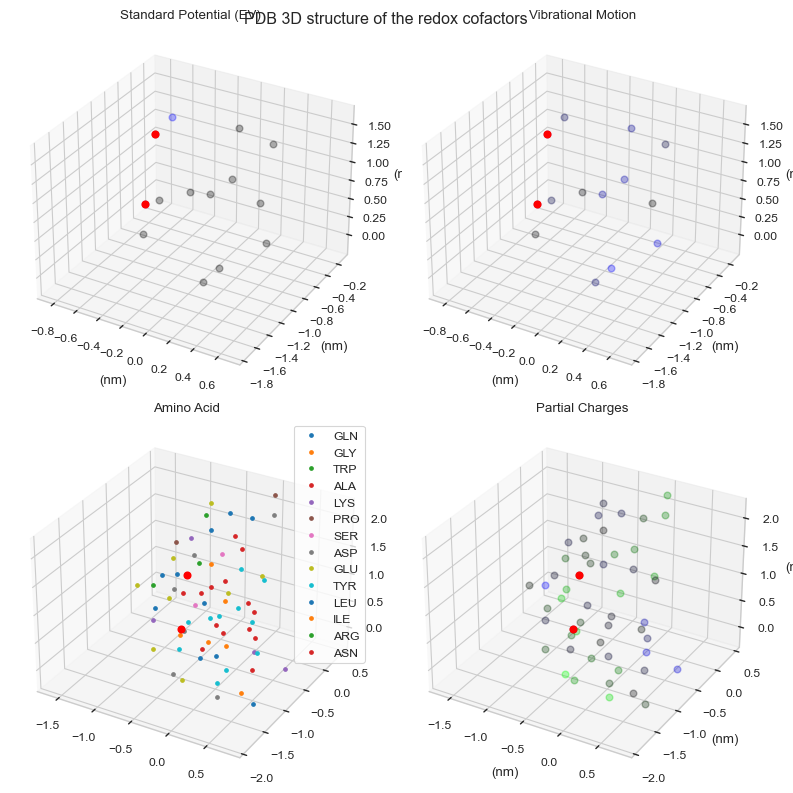

7.273e+10 1/s 1.375e-02 ns


In [1]:
#!pip install biopython
#!pip install networkx
#!pip install seaborn
#!pip install griddataformats
#!pip install matrepr
 
import numpy as np
import KMC_Protein 
from KMC_Protein import hbar_eV, kbT_eV,electronCharge
from numpy import random
rng= random.default_rng()
import matplotlib.pyplot as plt
import os
import scipy
import numpy as np
import networkx as nx
import seaborn as sns
import KMC_Plotting

from matrepr import mprint
from IPython.display import display, Math 


sns.set_style("whitegrid")
sns.set_context("paper")

pdb_file = r'./CTPRFixed4.pdb'


#comment out the following line if amino is not desired.
redoxEnergies = {'TRP': .85,
                 'TYR': 1.05, #1.08,
                 #'PHE': 1.15,  #  This is just a guess value from a few papers (Charge Transfer in Model Peptides: Obtaining Marcus Parameters from Molecular Simulation)
                 'CYS': .85, #1.12,
                 #'HIS': 1.31,
                 #'MET': 1.43,
                 #'BTN': 1.03
                 }  # https://iopscience.iop.org/article/10.1149/2.1471714jes

maxInteraction_radius_nm = 1.6  # nm   this will be used to determine neighbors of each redox cofactor

vibrationRadius_nm = .2  # nm this is a global value for the radius of the vibration sphere of the amino acid, only used if there is not an .std file for this protein

dutton_radius_nm = 1.35 # nm maximum distance between the redox cofactor that allows for electron transfer

reorgE_EV=.2  #standard reorganization energy in eV

injectionEnergy = 5e-6 # eV  energy difference from metal to the injection amino acid
injectionReorg_EV = .16 # eV reorganization energy for the injection amino acid

injectionAminos = [{'residue':'TRP', 'model':0, 'chain':'A', 'index':35} ]

exitAminos  =  [{'residue':'TYR', 'model':0, 'chain':'A', 'index':88} ]

appliedVoltage_V = .2 #V  #assumed to be the voltage at the electrodes


print('Loading PDB file...', pdb_file)

#estimate the center of mass for each amino acid 
atom_COM,activeAminos = KMC_Protein.LoadAminoCenterOfMass(pdb_file, redoxEnergies,injectionAminos,exitAminos, verbose=True )

KMC_Plotting.PlotPDBProjections(activeAminos,atom_COM,injectionAminos,exitAminos) 

G0 = 2*np.power(electronCharge,2)*injectionEnergy/hbar_eV/np.sqrt( np.pi * injectionReorg_EV*kbT_eV )*np.exp(-1*injectionReorg_EV /4/kbT_eV ) / 1.6022e-19#*  # 2e^2/hbar * injectionEnergy

injectPrefactor =  2*np.pi/hbar_eV/np.sqrt( 4*np.pi*reorgE_EV*kbT_eV  ) *np.exp(-.3/kbT_eV )  *np.exp(-1*injectionReorg_EV /4/kbT_eV )

print(f"{injectPrefactor:.3e} 1/s {1/injectPrefactor*1e9:.3e} ns" )


## CTPR 4

We are showing the center of mass of all the redox active residues in the CTPR molecule to allow comparison with the published values in 
[Long-Range Conductivity in Proteins Mediated by Aromatic Residues](https://pubs.acs.org/doi/10.1021/acsphyschemau.3c00017)

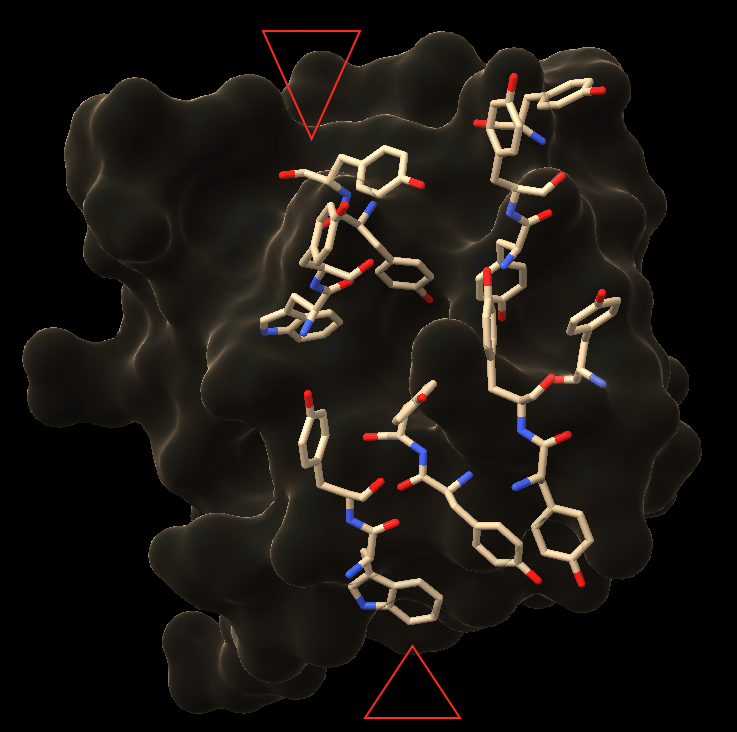

## CTPR4

  We are looking at the conductivity of this constructed protein, The electron is inserted into the structure at the base of the two streptavidins at the Amino acid location marked by red 
The above graphs show the various parameters that have been calcuted about this protein structure from other tools.  

### Standard Potential

The redox factors are taken from literature and assumed to be unaltered by the protein environment.

### Potentials

 Potentials have been calcuated from [Adaptive Poisson-Boltzmann Solver ](https://server.poissonboltzmann.org/)  -  [literature](https://pubmed.ncbi.nlm.nih.gov/28836357/)

### Vibrational Motion

 The Vibrational Motion has been determined by running CG simulations in [CafeMol](https://www.cafemol.org/)  -   [literature](https://pubs.acs.org/doi/full/10.1021/ct2001045) using beads on a chain with charges derived from the RESPAC

### Partial Charges

 Partial charges of the chain as estimated by APBS and the [RESPAC](https://pubs.acs.org/doi/full/10.1021/ct4007162) method


Driving force for electron transfer in molecule is 0.01 V/nm
Potentials mapped
Embedding Found
Total pot (eV) 0.008556954891164389 -0.09922570019094072
charges (e) 2.1155 -1.9152
Smoothing Energy Map


d:\PythonProj\NovoSmithy\ProteinConductance\KMC_Plotting.py:145: RuntimeWarning: invalid value encountered in scalar divide
  apbsStruct = np.max(potentials)/np.max(apbsStruct)*apbsStruct
d:\PythonProj\NovoSmithy\ProteinConductance\KMC_Plotting.py:159: RuntimeWarning: divide by zero encountered in log10
  vibrateStruct = np.max(np.log10( vibrationPoints))/np.max(vibrateStruct)*vibrateStruct


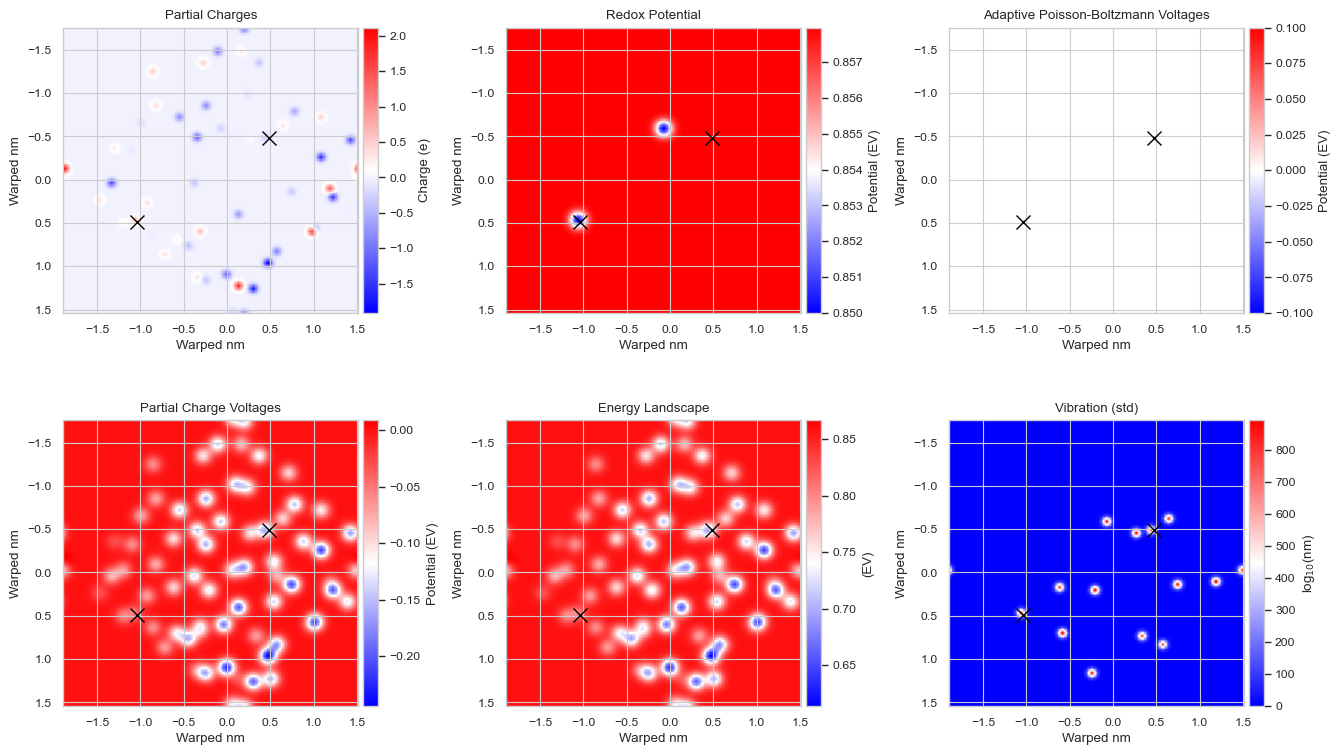

In [2]:
field, fieldZero =KMC_Protein. CalculatePotentials(atom_COM,activeAminos,injectionAminos[0],exitAminos[0],appliedVoltage_V, verbose =True)
KMC_Plotting.CreateProteinManifold(atom_COM, verbose=True)
 
KMC_Plotting.PlotPotentialMap(atom_COM )

### Manifold graphs

3D structure of the protein complex was reduced to 2D using a manifold esimate to allow easier viewing of the energy landscape.  Most of the relationships between the different redox cofactors have been preserved.  The inject and removal points have been marked with X allowing visualization of pathways that may form.

### Estimation of the driving bias

We consider the self potential of the protein as derived from the CHARMM force field through the APBS program.  The induced charges are then added to give the potential from the charged amino acids inside the protein.  Finally, the redox potentials of the various amino acids are added to the landscape. 

The driving bias from the applied voltage is approximated by using this graph (CTPR supplimental )[https://pubs.acs.org/doi/suppl/10.1021/acsphyschemau.3c00017/suppl_file/pg3c00017_si_001.pdf]

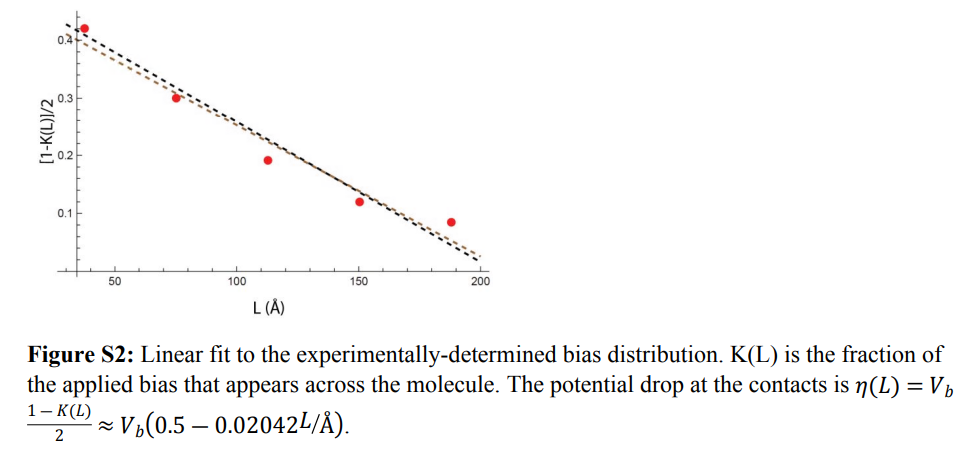

In [3]:
    
def PlotModelRates(G):
    plt.figure(figsize=(5,5))
    
    ratesForward = []
    distance = [] 
    for node in G.nodes():
        for edge in G.edges(node):
            ratesForward.append(G.edges[edge]['rate'])
            distance.append(G.edges[edge]['minDist'])
    plt.semilogy(distance,ratesForward,'.')
    plt.xlabel('Distance (nm)')
    plt.ylabel('Rate (1/ns)')
    plt.show()

    


## Rate Calculations
We are assuming that the jumps performed between each redox cofact can be modeled by Marcus theory with each jump modeled by the following equation

$k_{et} = \frac{2\pi}{\hbar}| H_{AB} |^2\frac{1}{\sqrt{ 4 \pi \lambda k_B T }} \exp(- \frac {\Delta F^{\dagger}} {k_B T} )  $

where

$\Delta F^{\dagger} = \frac{(\lambda + \Delta G^{\circ} + e\Delta V)^2}{4 \lambda k_B T}$ as shown in the Gibb's change in the graph above. As we do not have precise calculations of $\Delta G^{\circ}$, the redox standard potentials are used 

from [Long-range electron transfer](https://www.pnas.org/doi/10.1073/pnas.0408029102) and [Theory and Electrochemistry of Cytochrome c](https://pubs.acs.org/doi/10.1021/acs.jpcb.7b00917) we can model the complicated action of the electron transfering to the next redox cofactor with a simplified form for the distance dependance of 

$ | H_{AB} | \propto exp ( - \frac { \gamma (p)} {2} R) $

where $p$ is the percent of protein media between the redox cofactors as shown in the distance prefactor graph.







## Gamma calculations

The tunnel time between redox cofactors is strongly dependant on which media carries the electron as show in the graph from [Long-range electron transfer](https://www.pnas.org/doi/10.1073/pnas.0408029102) 

![image-3.png](attachment:image-3.png)

While most proteins are solid, this construct has a number of jumps that travel through the water environment.  In order to deal with the different media, the path that the electron travels is examined to determine whether it moves through protein media or through the water environment. 

![image.png](attachment:image.png)

Image showing the jumps from one Tyrosine to the next and the path the electrode must travel.  The gamma for each pair of neighbors is estimated to allow rate calculations to be adjusted.

min neighbors: 12
max neighbors: 26
mean neighbors: 19.714285714285715
scale metric of graph: 57848.0
std neighbors: 3.98978286964827
number of redox cofactors: 14
number of tunnel gaps: 138


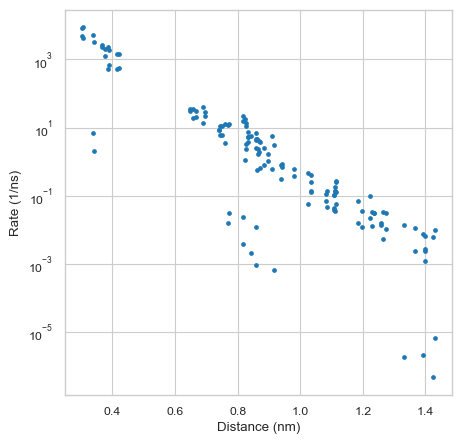

In [4]:
from KMC_Protein import MinDistanceA,getNeighborOccupancy
def ConnectGraphsNonAdiabatic(activeAminos, injectionAminos,exitAminos, atom_COM,  maxInteraction_radius_nm,  verbose=False ):
    
    
    beta = 1/(kbT_eV)  # 1/kT in 1/eV

    for i in range(len(activeAminos)):
        activeAminos[i]['neighbors'] = [] #clear out the last list to make debugging easier
        
    G_NonAdi = nx.DiGraph()
    
    for i in range(len(activeAminos)):
        isStart =False 
        isEnd =False
        for iAmino in injectionAminos:
            if activeAminos[i]['chain']== iAmino['chain'] and activeAminos[i]['index']== iAmino['index']:
                isStart = True
                
        for eAmino in exitAminos:
            if activeAminos[i]['chain']== eAmino['chain'] and activeAminos[i]['index']== eAmino['index']:
                isEnd = True
                
        G_NonAdi .add_node(i, label=f"{activeAminos[i]['amino']} {activeAminos[i]['index']}",  isStart=isStart, isEnd=isEnd, activeAmino = activeAminos[i])
    
    # determine the pairwise distance between each redox cofactor
    for i in range(len(activeAminos)):
        for j in range(i+1, len(activeAminos)):
            r_COM = np.linalg.norm(activeAminos[i]['centerOfMass']-activeAminos[j]['centerOfMass'])

            # check if the redox cofactors are within the interaction radius

            if r_COM < maxInteraction_radius_nm:
                 
                donor, acceptor = activeAminos[i], activeAminos[j]
                # walk through all the redox cofactor atoms and determine the minimum distance to the other redox cofactor atoms
                minDonor,minAcceptor,r_min = MinDistanceA(donor, acceptor)
                
                sasa=(donor['SASA']+acceptor['SASA'] )
                ra=2
                rd=2
                es=5.18+.016*sasa
                reorgE_EV=( 1/1.84-1/es)*( 1/(2*ra/0.53) + 1/(2*rd/0.53)-1/(r_min/0.53) )+.05
                attemptFrequency = 2*np.pi/hbar_eV/np.sqrt( 4*np.pi*reorgE_EV*kbT_eV  )   # attempt prefactor 2 pi/ hbar
                

                ##################################################################################
                #################     Determine distance prefactor Vr ############################
                ##################################################################################
                 # determine the occupancy of the path between the two redox cofactors
                protDensity =  getNeighborOccupancy(minDonor,minAcceptor, atom_COM)
    
                # protDensity is going to vary between 0 and 1.  -.9 represents tunneling through the 100% protein media, while -2.8 estimates tunneling through vacuum or water
                #water rate is taken from Long-range electron transferHarry B. Gray†and Jay R. Winkler
                gamma =    -1.2*protDensity - 1.4*(1-protDensity)
    
                # distance rate for fixed pdb file coordinates
                distance_rate = attemptFrequency * np.exp(gamma * r_min)  *.01
                
                if  donor['std'] > 0 and acceptor['std'] > 0:
                    vibrate = np.mean([donor['std'], acceptor['std']]) 
                    alter = np.exp(( -1.4 *vibrate)**2) 
     
                ##################################################################################
                #################     Determine energy rates          ############################
                ##################################################################################
                # determine the energy difference between the two redox cofactors
                
                 #get the energy difference between the two redox cofactors    
                dE = acceptor['redoxEnergy_EV']-  donor['redoxEnergy_EV'] 
                dV = acceptor['totalPotential'] - donor['totalPotential'] 
                
                #get the forward rate 
                dF_F = (reorgE_EV + dE+dV)**2/(4*reorgE_EV)
                
                energy_rate_forward = np.exp(-beta * dF_F)
                
                #get the backard rate for returning to acceptor
                dF_B = (reorgE_EV - dE -dV)**2/(4*reorgE_EV)
                energy_rate_back = np.exp(-beta * dF_B)
    
                
                k_NA_forward = distance_rate*energy_rate_forward
                k_NA_back    = distance_rate*energy_rate_back
                
                 
                ##################################################################################
                #################     book keeping for networks       ############################
                ##################################################################################
                
                G_NonAdi.add_edge(i, j, time=1e9/k_NA_forward, rate = k_NA_forward*1e-9, dist = r_COM, minDist = r_min/10.0 )
                G_NonAdi.add_edge(j, i, time=1e9/k_NA_back, rate = k_NA_back*1e-9, dist = r_COM, minDist = r_min/10.0 )
                
               
             
    if verbose:
        # determine the connectedness of the redox cofactors
        degrees = sorted(d for n, d in G_NonAdi.degree())
        print(f"min neighbors: {np.min(degrees)}")
        print(f"max neighbors: {np.max(degrees)}")
        print(f"mean neighbors: {np.mean(degrees)}")
        print(f"scale metric of graph: {nx.s_metric(G_NonAdi, normalized=False)}")
        
        print(f"std neighbors: {np.std(degrees)}")
        print(f'number of redox cofactors: { G_NonAdi.number_of_nodes()}')
        print(f'number of tunnel gaps: { G_NonAdi.number_of_edges()}')        
     
        
    return G_NonAdi

G_NonAdi=ConnectGraphsNonAdiabatic(activeAminos, injectionAminos,exitAminos, atom_COM,  maxInteraction_radius_nm,  verbose=True )
PlotModelRates(G_NonAdi)   

## Published network

We do not have the full power of an all atom simulation of the protein.  The values published in the suppliment of 
 (Long-RangeConductivityin Proteins Mediated by Aromatic Residues)[https://pubs.acs.org/doi/epdf/10.1021/acsphyschemau.3c00017] were directly imported to allow a check of the conductivity values used here.
 
 We select an interaction radius, and then limit the rates at that value.  As can be seen in the figure above (Distance Prefactor graph), we are able to largely mimic the given values
![image-2.png](attachment:image-2.png)

min neighbors: 4
max neighbors: 24
mean neighbors: 11.076923076923077
scale metric of graph: 13560.0
std neighbors: 6.256830586973156
number of redox cofactors: 13
number of tunnel gaps: 72


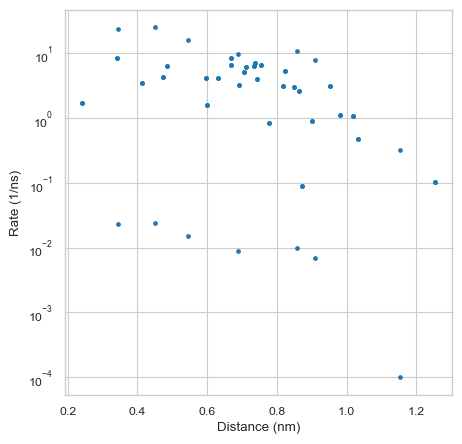

In [5]:
def ConnectPublished(activeAminos , injectionAminos,exitAminos,verbose=False ):
    for i in range(len(activeAminos)):
        activeAminos[i]['neighbors'] = [] #clear out the last list to make debugging easier
   
    rates = [x.split("\t") for x in """35	36	0.024	25.621	325.759	1.08	4.51
35	42	0.007	7.848	0.441	1.09	9.097
35	43	0.0001	0.327	0.012	1.61	11.542
35	54	0.023	24.311	975.706	0.59	3.437
35	55	0.015	15.964	41.042	1.03	5.45
36	42	3.183	3.183	0.628	1.27	9.529
36	43	3.072	3.072	1.42	1.02	8.49
36	54	6.589	6.589	26.219	1.15	6.674
36	55	1.702	1.702	4661.247	0.55	2.421
42	43	6.31	6.31	327.05	1.06	4.85
42	48	8.476	8.476	45.609	1.07	6.683
42	54	6.165	6.165	13.142	0.65	7.124
42	55	5.081	5.081	11.552	1.03	7.069
43	48	8.481	8.481	4563.516	0.51	3.419
43	54	3.125	3.125	2.025	1.25	8.177
43	55	3.502	3.502	559.671	0.69	4.136
48	54	1.095	1.095	0.18	1.28	10.181
48	55	4.176	4.176	44.744	1	5.98
54	55	4.293	4.293	269.791	0.86	4.737
36	69	11.08	0.01	0.692	1.06	8.594
36	70	7.127	7.127	11.684	1.16	7.384
36	88	1.104	1.104	0.237	1.37	9.799
43	70	6.422	6.422	10.354	1.06	7.35
43	76	3.963	3.963	5.817	1.14	7.441
43	77	4.153	4.153	28.054	1.05	6.308
43	88	0.469	0.469	0.099	1.42	10.328
43	89	3.208	3.208	10.422	1.25	6.903
48	70	0.104	0.104	0.011	1.42	12.525
48	76	6.703	6.703	8.679	1.1	7.543
48	77	5.376	5.376	2.989	1.06	8.233
55	69	9.752	0.009	4.441	1.01	6.901
55	70	0.918	0.918	0.447	1.09	9.022
55	76	1.606	1.606	26.667	0.94	6.001
55	77	2.653	2.653	1.108	1.39	8.64
55	88	0.845	0.845	1.888	1.04	7.775
55	89	0.089	0.089	0.33	1.25	8.734
""".split('\n') if x!='']
 

    nodeDict = {}
    cc=0
    for aa in activeAminos:
        nodeDict[aa['index']] = cc
        cc+=1
        
    G_min = nx.DiGraph()
    pubRates = []
    nodes = []
    for x in rates:
        #Donor	Acceptor	Forward	Backward	g	R_COM	r_Min
        index,index2,forward,back,g,r_com,r_min= nodeDict[int(x[0])],nodeDict[ int(x[1])], float(x[2])*1e9, float(x[3])*1e9,float(x[4]), float(x[5]),float(x[6])
        pubRates.append( [index,index2,forward,back,g,r_com,r_min])
        nodes.append(index)
        nodes.append(index2)
        
    nodes = np.unique(nodes)
    for i in nodes:
        isStart =False 
        isEnd =False
        for iAmino in injectionAminos:
            if activeAminos[i]['chain']== iAmino['chain'] and activeAminos[i]['index']== iAmino['index']:
                isStart = True
                
        for eAmino in exitAminos:
            if activeAminos[i]['chain']== eAmino['chain'] and activeAminos[i]['index']== eAmino['index']:
                isEnd = True
        G_min .add_node(i, label=f"{activeAminos[i]['amino']} {activeAminos[i]['index']}",  isStart=isStart, isEnd=isEnd, activeAmino = activeAminos[i])

    for x in pubRates:
        G_min.add_edge(x[0], x[1], time=1e9/x[2] ,rate = x[2]*1e-9, dist = x[5]/10, minDist = x[6]/10 )
        G_min.add_edge(x[1], x[0], time=1e9/x[3] ,rate = x[3]*1e-9, dist = x[5]/10, minDist = x[6]/10 )
             
    if verbose:
        # determine the connectedness of the redox cofactors
        degrees = sorted(d for n, d in G_min.degree())
        print(f"min neighbors: {np.min(degrees)}")
        print(f"max neighbors: {np.max(degrees)}")
        print(f"mean neighbors: {np.mean(degrees)}")
        print(f"scale metric of graph: {nx.s_metric(G_min, normalized=False)}")
       
        print(f"std neighbors: {np.std(degrees)}")
        print(f'number of redox cofactors: { G_min.number_of_nodes()}')
        print(f'number of tunnel gaps: { G_min.number_of_edges()}')        
    
    return G_min 

G_pub=ConnectPublished(activeAminos , injectionAminos,exitAminos, verbose=True )
PlotModelRates(G_pub)

## Adiabatic network

We are assuming that the jumps performed between each redox cofact can be modeled by Marcus theory with each jump modeled by the following equation

$k_{et} = \frac{2\pi}{\hbar}| H_{AB} |^2\frac{1}{\sqrt{ 4 \pi \lambda k_B T }} \exp(- \frac {\Delta G^{\dagger}} {k_B T} )  $

where

$\Delta F^{\dagger} = \frac{(\lambda + \Delta G^{\circ} + e\Delta V)^2}{4 \lambda k_B T}$ as shown in the Gibb's change in the graph above

from [Long-range electron transfer](https://www.pnas.org/doi/10.1073/pnas.0408029102) and [Theory and Electrochemistry of Cytochrome c](https://pubs.acs.org/doi/10.1021/acs.jpcb.7b00917) we can model the complicated action of the electron transfering to the next redox cofactor with a simplified form for the distance dependance of 

$ | H_{AB} |^2 \propto exp ( -1.4 R) exp( \frac {1}{2} \gamma^2<(\delta R)^2>  ) $

last the rates are calculated by using 

$ k = \frac {K_{NA}} {1+ g} $

where 

$ g= \frac { \pi V_{DA}^2 \tau_x} { \hbar \sqrt { \lambda F_{act}}} \exp { \frac {3} {2} \gamma^2 < (\delta R)^2>} $

$ \tau_x $ is estimated from the paper

min neighbors: 12
max neighbors: 26
mean neighbors: 19.714285714285715
scale metric of graph: 57848.0
std neighbors: 3.98978286964827
number of redox cofactors: 14
number of tunnel gaps: 138


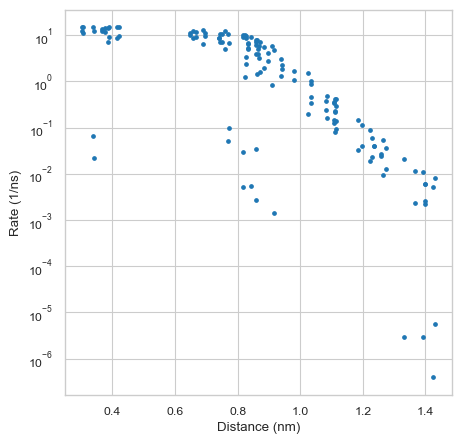

In [6]:


def ConnectGraphsAdiabatic(activeAminos,injectionAminos,exitAminos, atom_COM, maxInteraction_radius_nm, verbose=False ):
    
    beta = 1/(kbT_eV)  # 1/kT in 1/eV
    
    for i in range(len(activeAminos)):
        activeAminos[i]['neighbors'] = [] #clear out the last list to make debugging easier
         
    G_Adi = nx.DiGraph()
    for i in range(len(activeAminos)):
        isStart =False 
        isEnd =False
        for iAmino in injectionAminos:
            if activeAminos[i]['chain']== iAmino['chain'] and activeAminos[i]['index']== iAmino['index']:
                isStart = True
                
        for eAmino in exitAminos:
            if activeAminos[i]['chain']== eAmino['chain'] and activeAminos[i]['index']== eAmino['index']:
                isEnd = True
                
        G_Adi .add_node(i, label=f"{activeAminos[i]['amino']} {activeAminos[i]['index']}",  isStart=isStart, isEnd=isEnd, activeAmino = activeAminos[i])
    
    # determine the pairwise distance between each redox cofactor
    for i in range(len(activeAminos)):
        for j in range(i+1, len(activeAminos)):
            r_COM = np.linalg.norm(activeAminos[i]['centerOfMass']-activeAminos[j]['centerOfMass'])
            # check if the redox cofactors are within the interaction radius
            if r_COM < maxInteraction_radius_nm:
                 
                # walk through all the redox cofactor atoms and determine the minimum distance to the other redox cofactor atoms
                donor, acceptor = activeAminos[i], activeAminos[j]
                # walk through all the redox cofactor atoms and determine the minimum distance to the other redox cofactor atoms
                minDonor,minAcceptor,r_min = MinDistanceA(donor, acceptor)
                
                ##################################################################################
                #################     Determine distance prefactor Vr ############################
                ##################################################################################
                
                sasa=(donor['SASA']+acceptor['SASA'] )
                ra=2
                rd=2
                es=5.18+.016*sasa
                reorgE_EV=( 1/1.84-1/es)*( 1/(2*ra/0.53) + 1/(2*rd/0.53)-1/(r_min/0.53) )+.05
                attemptFrequency = 2*np.pi/hbar_eV/np.sqrt( 4*np.pi*reorgE_EV*kbT_eV  )   # attempt prefactor 2 pi/ hbar
                
                
                if  donor['std'] > 0 and acceptor['std'] > 0:
                    vibrate = np.mean([donor['std'], acceptor['std']]) 
                    
                gammaV= -1.4
                preVibrate = 2.7/7* np.exp(gammaV/2 * r_min)
                preG= (.01e-9)* np.pi*preVibrate**2/hbar_eV*np.exp( 3/2*gammaV*gammaV*vibrate*vibrate) 
                
                distance_rate_vibrate =attemptFrequency * np.exp(gammaV * r_min) * np.exp(gammaV*gammaV*vibrate*vibrate/2) *.1

                
                ##################################################################################
                #################     Determine energy rates          ############################
                ##################################################################################
                # determine the energy difference between the two redox cofactors
                dE = acceptor['redoxEnergy_EV']-  donor['redoxEnergy_EV'] 
                dV =   acceptor['totalPotential'] - donor['totalPotential'] 
                
                
                #get the forward rate 
                dF_F = (reorgE_EV + dE+dV)**2/(4*reorgE_EV)
                
                g_F=preG/ np.sqrt(reorgE_EV* dF_F)
                
                energy_rate_forward = np.exp(-beta * dF_F)
                
                #get the backard rate for returning to acceptor
                dF_B = (reorgE_EV - dE -dV)**2/(4*reorgE_EV)
                g_B=preG/ np.sqrt(reorgE_EV* dF_B)
                
                energy_rate_back = np.exp(-beta * dF_B)
                
                k_NA_forward = distance_rate_vibrate * energy_rate_forward/(1+g_F)
                k_NA_back    =  distance_rate_vibrate * energy_rate_back/(1+g_B)
                
                ##################################################################################
                #################     book keeping for networks       ############################
                ##################################################################################
                G_Adi.add_edge(i, j, time=1e9/k_NA_forward, rate = k_NA_forward*1e-9, dist = r_COM, minDist = r_min /10.0)
                G_Adi.add_edge(j, i, time=1e9/k_NA_back, rate = k_NA_back*1e-9, dist = r_COM, minDist = r_min/10.0 )
                
             
    if verbose:
        # determine the connectedness of the redox cofactors
        degrees = sorted(d for n, d in G_Adi.degree())
        print(f"min neighbors: {np.min(degrees)}")
        print(f"max neighbors: {np.max(degrees)}")
        print(f"mean neighbors: {np.mean(degrees)}")
        print(f"scale metric of graph: {nx.s_metric(G_Adi, normalized=False)}")
      
        print(f"std neighbors: {np.std(degrees)}")
        print(f'number of redox cofactors: { G_Adi.number_of_nodes()}')
        print(f'number of tunnel gaps: { G_Adi.number_of_edges()}')        
        
    return G_Adi

G_Adi=ConnectGraphsAdiabatic(activeAminos,injectionAminos,exitAminos, atom_COM, maxInteraction_radius_nm, verbose=True )
PlotModelRates(G_Adi)   

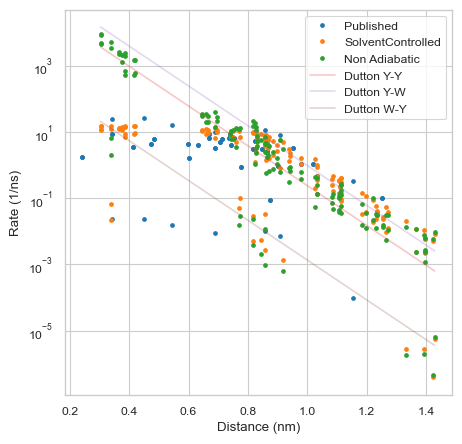

In [7]:
models =[{"name":"Published","Graph":G_pub},{"name":"SolventControlled","Graph":G_Adi},{"name":"Non Adiabatic","Graph":G_NonAdi} ]

def PlotAllModelRates(models):
    plt.figure(figsize=(5,5))
    for model in models:
        ratesForward = []
        distance = [] 
        for node in model["Graph"].nodes():
            for edge in model["Graph"].edges(node):
                ratesForward.append(model["Graph"].edges[edge]['rate'])
                distance.append(model["Graph"].edges[edge]['minDist'])
        plt.semilogy(distance,ratesForward,'.', label=model["name"])
        
    dG=.85- 1.08
    r=np.array( sorted(distance))*10
    plt.plot(r/10,10**( 15-.6*r-3.1*(reorgE_EV)**2/reorgE_EV-9),'-',alpha=.25,label='Dutton Y-Y') 
    plt.plot(r/10,10**( 15-.6*r-3.1*(dG+reorgE_EV)**2/reorgE_EV-9),'-',alpha=.25,label='Dutton Y-W') 
    plt.plot(r/10,10**( 15-.6*r-3.1*(reorgE_EV-dG)**2/reorgE_EV-9),'-',alpha=.25,label='Dutton W-Y') 
    plt.xlabel('Distance (nm)')
    plt.ylabel('Rate (1/ns)')
    plt.legend()
    plt.show()
    
PlotAllModelRates(models)    

### Node maps. 

Node maps abandon the euclidean geometry completely to form networks based on the nfearest neighbor connections and the transfer times between the redox cofactors. The networks indicate that while we do have error in the various jumps, the overal random nature of the errors and the large number of interconnections between the aromatic amino acids largely cancel out to give an average value of tranferance that should match with the higher resolution all atom calculations.  This is not true for the Phi29  calculations where there are single amino acids that handle almost all the current that is transfered

In [8]:
def DrawGraph(G, layout, subPlot, title,labelLongest):
    plt.subplot(subPlot)
    pos=layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    
    startIndex =[]
    endIndex = []   
    for node in G.nodes():
        if G.nodes[node]['isStart']:
            startIndex.append(node)
        if G.nodes[node]['isEnd']:
            endIndex.append(node)
    nx.draw_networkx_nodes(G, pos, nodelist=startIndex , node_color='r', node_size=30)
    nx.draw_networkx_nodes(G, pos, nodelist=endIndex, node_color='g', node_size=30)
    
    if labelLongest:
        #find the three longest edges and label them
        edgeList = list(G.edges(data='time'))
        edgeList.sort(key=lambda x: x[2], reverse=True)
        
        edges ={}
        for edge in edgeList:
            edges[(edge[0],edge[1])]=f"{edge[2]:.2e}"
        
        nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels=edges,
            font_color='red'
        )

    plt.title(title)    
    
def DrawLayout(Gs, layout,   title,  labelLongest=False):
    plt.figure(figsize=(5*len(Gs),5))
    for i in range(len(Gs)):
        DrawGraph(Gs[i]["Graph"], layout, 100+len(Gs)*10+ i+1, Gs[i]["name"], labelLongest)
    plt.suptitle(title)
    plt.show() 

## 2D Network Visualizations

Networx comes with a number of nice visualization techniques.  We can take the complicated 3D shape of the protein and collapse it down to 2D to show the map as experienced by an electron.  

Connections and pathways are simple to visualize in this manner. Gaps between the nodes approximately represent the distance between redox cofactors.

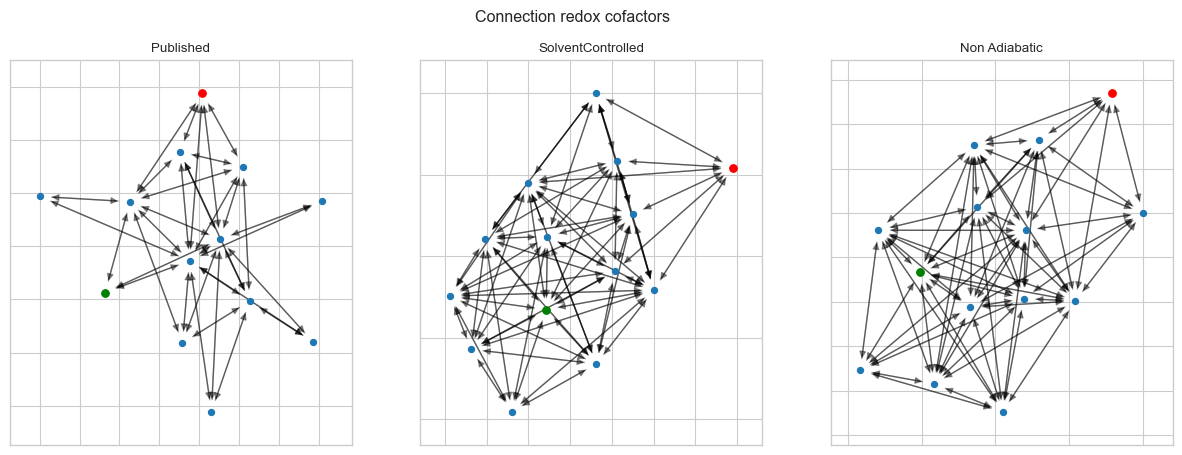

In [9]:
DrawLayout(models, lambda G: nx.spring_layout(G,weight='minDist'), 'Connection redox cofactors',   False)

## Rates

More interesting for conductance is that time it takes a electron to jump from one site to another, we use the rates to determine pathways.  Long arrows represent unlikely jumps (long relative times)

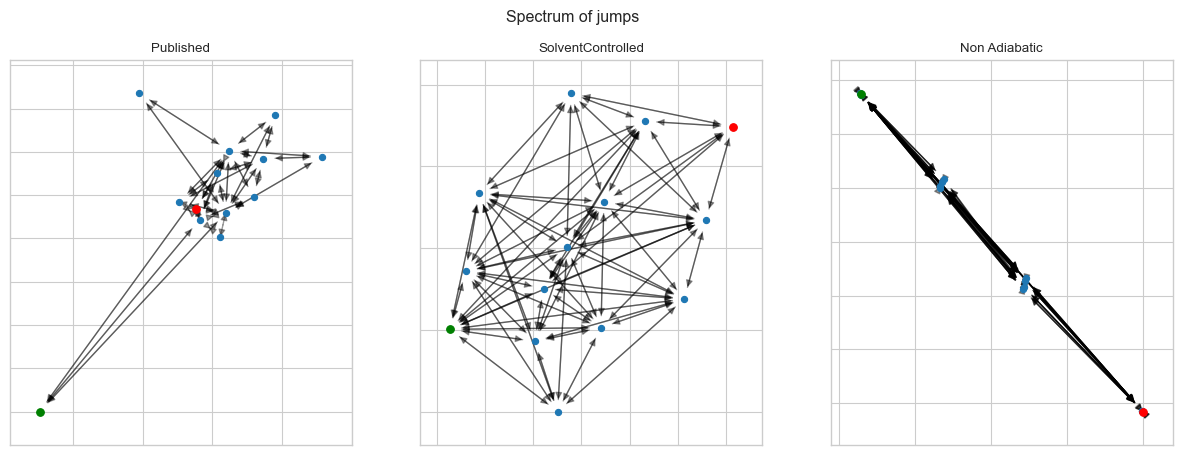

In [10]:
DrawLayout(models, lambda G: nx.kamada_kawai_layout(G,weight='time'), 'Spectrum of jumps',   False )

In [11]:
def SolveRateEquations(G, startNodes, field,    weight='rate', verbose=False):
    rateMatrix= nx.adjacency_matrix(G,weight=weight)
    rateMatrix=rateMatrix.todense()
    rowmap = []
    for node in G.nodes():
        if G.nodes[node]['label']!='startNode' and  G.nodes[node]['label']!='endNode':
            rowmap.append(node)
    
    for i in range(rateMatrix.shape[0]):
        rateMatrix[i,i]=-1*np.sum(rateMatrix[:,i])
        
    dP=np.zeros(rateMatrix.shape[0])    .T
    for i in startNodes:
        rateMatrix[i,:]=1
        dP[i]=1

    if verbose:        
        mprint(rateMatrix, max_rows=None, max_cols=None)
       

    #mprint(rateMatrix@P, max_rows=None, max_cols=None)
    P=np.linalg.lstsq(rateMatrix, dP, rcond=None)[0]
    error=np.std(dP- rateMatrix@ P)
    if verbose:
        print('Probabilities')
        mprint( P, max_rows=None, max_cols=None)
        print(f'std error:{error:.2e}')

    Vi=[]
    F = np.linalg.norm(field)
    
    fDir = field/F
    Ps = 0 
    maxX = -100000
    
    #activeAmino
    
    for i in range(len(P)):
        if i<len(rowmap):
            Ps+= P[i]
        for j in range(len(P)):
            if i!=j and i<len(rowmap) and j<len(rowmap):
                donor  = G.nodes[rowmap[i]]['activeAmino']
                acceptor  = G.nodes[rowmap[j]]['activeAmino']
                dX = np.dot( fDir, acceptor['centerOfMass']-donor['centerOfMass'])
                if dX>maxX:
                    maxX = dX*1e-9
                Vi.append( P[i]*rateMatrix[i,j]  *dX )#1/ns * nm => m/s
                
                
    return np.abs( np.sum(Vi)/Ps/(F/maxX)* 1e4), error, P,rateMatrix

def SolveNonLinearRateEquations(G, startNodes, field,    weight='rate', verbose=False):
    
    linRate,error,P,rateMatrix = SolveRateEquations(G, startNodes, field,    weight='rate', verbose=False)   

    rateMatrix = rateMatrix[0:len(P)-2,0:len(P)-2]
    P = P[0:len(P)-2]
    for k in range(5000):
        for i in range(len(P)):
            pSum=0
            diffSum =0 
            rateSum =0
            for j in range(len(P)):
                if i!=j:
                    pSum += rateMatrix[i,j]*P[j]
                    rateSum += rateMatrix[j,i]
                    diffSum += (rateMatrix[j,i]-rateMatrix[i,j])*P[j]
            P[i]= pSum/(rateSum-diffSum)    
            
        P=(P-np.min(P))/(np.max(P)-np.min(P))
        P=P/np.sum(P)
        
    rowmap = []
    for node in G.nodes():
        if G.nodes[node]['label']!='startNode' and  G.nodes[node]['label']!='endNode':
            rowmap.append(node)
            
    F = np.linalg.norm(field)
    
    fDir = field/F
    maxX = -100000
    Vi=[]
            
    for i in range(len(P)):
        for j in range(len(P)):
            if i!=j :
                donor  = G.nodes[rowmap[i]]['activeAmino']
                acceptor  = G.nodes[rowmap[j]]['activeAmino']
                dX = np.dot( fDir, acceptor['centerOfMass']-donor['centerOfMass'])
                if dX>maxX:
                    maxX = dX*1e-9
                Vi.append( P[i]*rateMatrix[j,i]*(1-P[j])  *dX )#1/ns * nm => m/s
                
                
    return linRate,error,np.abs( np.sum(Vi)/np.sum(P)/(F/maxX)* 1e4),  P,rateMatrix
 
        
    

In [12]:
#estimate the times for the injection and exit from the electrode into the amino acids
def CalculateMasterEquationMobility(models, appliedVoltage_V):
    nu=appliedVoltage_V/2
    rF=  scipy.special.erfc( (injectionReorg_EV+nu)/np.sqrt( 4* kbT_eV *injectionReorg_EV ) )
    rB = scipy.special.erfc( (injectionReorg_EV-nu)/np.sqrt( 4* kbT_eV *injectionReorg_EV ) )
    rF,rB=injectionEnergy/hbar_eV*rF,injectionEnergy/hbar_eV*rB
    print(f"{rF*1e-9:.2f} 1/ns,{rB*1e-9:.2f} 1/ns " ) 

    for model in models:
        G=model['Graph']

        #find the max node index        
        cc=0
        startIndex =[]
        endIndex = [] 
        hasInjections =False
        for node in G.nodes():
              if G.nodes[node]['label']=='startNode':
                hasInjections=True
                
        startNodes = [] 
        endNodes = []                
        for node in G.nodes():
            if node>cc:
                cc=node 
                
            if hasInjections:
                if G.nodes[node]['label']=='startNode':
                    startNodes.append(node)
                if G.nodes[node]['label']=='endNode':
                    endNodes.append(node)
            else:
                if G.nodes[node]['isStart']:
                    startIndex.append(node)
                if G.nodes[node]['isEnd']:
                    endIndex.append(node)

        #add in injection/extraction nodes to make circuit complete with metal electrodes
        cc+=1
        if hasInjections==False:
            for startNode in startIndex:
                G.add_node(cc, label="startNode",isStart=False, isEnd=False)
                G.add_edge(cc,startNode, time=1e9/rF , rate =rF*1e-9, dist = 0, minDist = 0)
                G.add_edge(startNode,cc, time=1e9/rB , rate =rB*1e-9, dist = 0, minDist = 0)
                startNodes.append(cc)
                 
                cc+=1
                
            for endNode in endIndex:
                G.add_node(cc, label="endNode",isStart=False, isEnd=False)
                G.add_edge(cc,endNode, time=1e9/rF , rate =rF*1e-9, dist = 0, minDist = 0)
                G.add_edge(endNode,cc, time=1e9/rB , rate =rB*1e-9, dist = 0, minDist = 0)
                endNodes.append(cc)
                 
                cc+=1    
         
        linmobility,error,mobility, _,_= SolveNonLinearRateEquations(G, startNodes, field,  verbose=True )
        display(Math(f" {model['name']} \\\\ Linear Mobility = {linmobility:.2e} \\\\ Non Linear Mobility  = {mobility :.2e}" + r"\frac {cm^2} {V * s}" ))    
         

CalculateMasterEquationMobility(models, appliedVoltage_V)     

0.03 1/ns,3.87 1/ns 


C:\Users\bashc\AppData\Local\Temp\ipykernel_29520\3150318021.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  rateMatrix= nx.adjacency_matrix(G,weight=weight)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TRP -> TRP 0  7 13.672749996185303   /A:35 /A:69 1.3672749996185303
TRP -> TYR 7  12 3.3998921513557434   /A:69 /A:88 0.33998921513557434
/A:35 /A:69 
{'amino': 'TRP', 'i': 5, 'SASA': 76.89927665604023, 'model': 0, 'chain': 'A', 'index': 35, 'centerOfMass': array([-0.39629522, -0.8340641 , -0.03608186], dtype=float32), 'sideAtoms': [['N', array([-0.1518    , -0.64489996, -0.0115    ], dtype=float32), 'N'], ['C', array([-0.2891    , -0.64180005,  0.0379    ], dtype=float32), 'CA'], ['C', array([-0.31370002, -0.5176    ,  0.1225    ], dtype=float32), 'C'], ['C', array([-0.3197, -0.7676,  0.1197], dtype=float32), 'CB'], ['O', array([-0.4176, -0.452 ,  0.1093], dtype=float32), 'O'], ['C', array([-0.3412, -0.8906,  0.0367], dtype=float32), 'CG'], ['C', array([-0.2664, -1.0047,  0.0379], dtype=float32), 'CD1'], ['C', array([-0.4441, -0.9109, -0.0604], dtype=float32), 'CD2'], ['C', array([-0.4258   , -1.0406001, -0.1141   ], dtype=float32), 'CE2'], ['C', array([-0.55079997, -0.83280003, -0.10

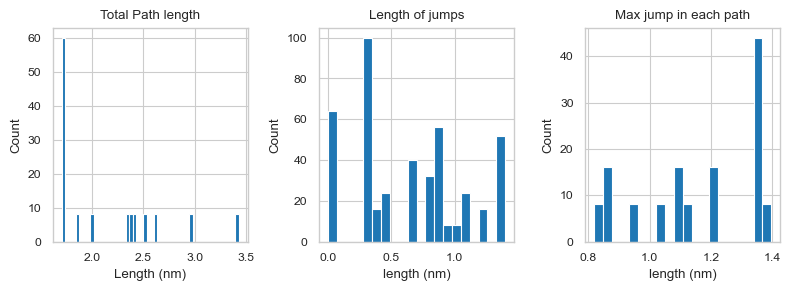

In [13]:
def CalculateDistancePaths(useMinimum=True):
    if useMinimum:
        weight='minDist'
    else:
        weight='distance'
    shortestPaths_connected=[]

    startNodes = []
    endNodes = []
    for node in G_Adi.nodes():
        if G_Adi.nodes[node]['isStart']:
            startNodes.append(node)
        if G_Adi.nodes[node]['isEnd']:
            endNodes.append(node)
            
    for startNode in startNodes:
        for endNode in endNodes:
            shortestPaths_connected.extend( KMC_Protein. CalculatePaths(G_Adi, startNode,endNode, weight=weight ))
    selected ="" 
    for paths in shortestPaths_connected:
        path=paths['path']
        for i in range(len(path)-1):
            donor , acceptor = G_Adi.nodes[path[i]]['activeAmino'], G_Adi.nodes[path[i+1]]['activeAmino']      
            _,_,mD= MinDistanceA(donor, acceptor)      
            print(f"{ donor['amino'] } -> { acceptor['amino'] } {path[i]}  {path[i+1]} {mD}   /{ donor['chain']}:{ donor['index']} /{ acceptor['chain']}:{ acceptor['index']} {G_Adi[ path[i]][path[i+1]]['minDist']}")
            selected += f"/{ donor['chain']}:{ donor['index']} "
        break 
    print(selected)
    KMC_Plotting. PlotDistancePaths(G_Adi, shortestPaths_connected, weight)
 
CalculateDistancePaths() 

## Path lengths

We do a quick check to see what the greatest jump is that the electron must make with respect to distance to get from from the inject to the exit site.  We then take the minimum of the longest jumps that all the paths must make to determine if there is a bottleneck that is larger than the Dutton radius.

### Shortest Paths

Finding the shortest paths from our injection to exit sites allows the simulation to find the upper bounds of the transfer rate

In order to get statistics for the paths, Dijkstra and Bellman-Ford's methods are used to find the shortest paths with respect to the tranfer time between the nodes.  

Additional information is gathered by requiring the Dijkstra and Bellman-Ford methods to visit random nodes in the molecule, resulting in a statisical variation of the routes and possible times.

Once the times have been identified, the transit time for the molecule is calculated by summing the times for each jump and then taking an inverse.

The current is estimated from the rate, ignoring the contact resistance and other factors that may play a role in that calculations

Network :  Published
Total paths tested:  43
The average travel time is 7.21e+01 ns
The molecule K(ET) is 1.39e+07 1/s



Network :  SolventControlled
Total paths tested:  43
The average travel time is 4.32e+01 ns
The molecule K(ET) is 2.31e+07 1/s



Network :  Non Adiabatic
Total paths tested:  41
The average travel time is 2.30e+01 ns
The molecule K(ET) is 4.35e+07 1/s





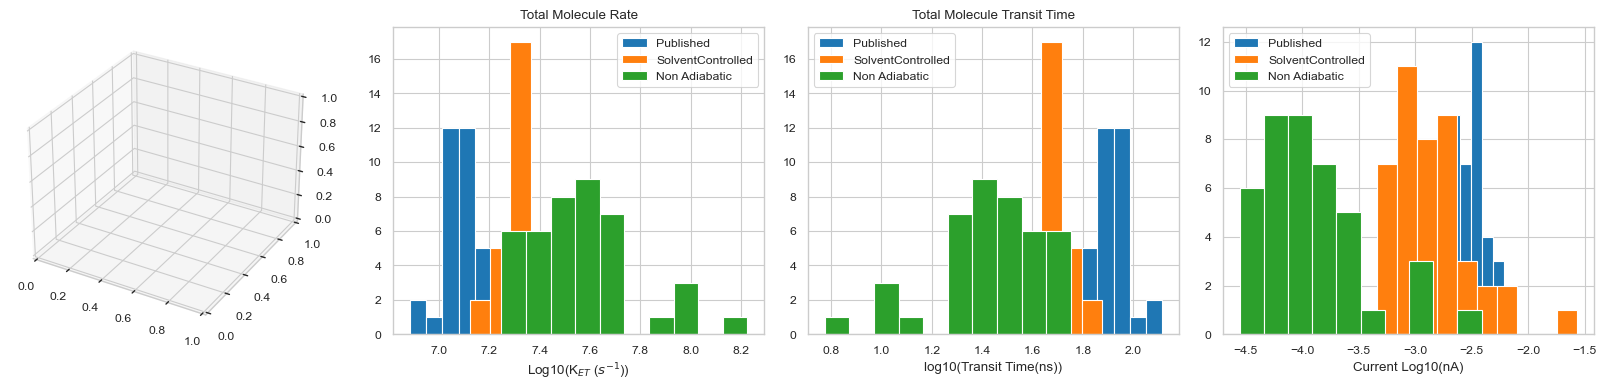

Smoothing Energy Map


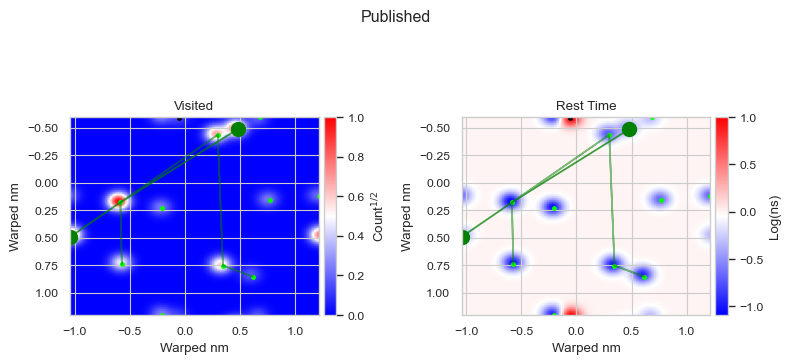

Smoothing Energy Map


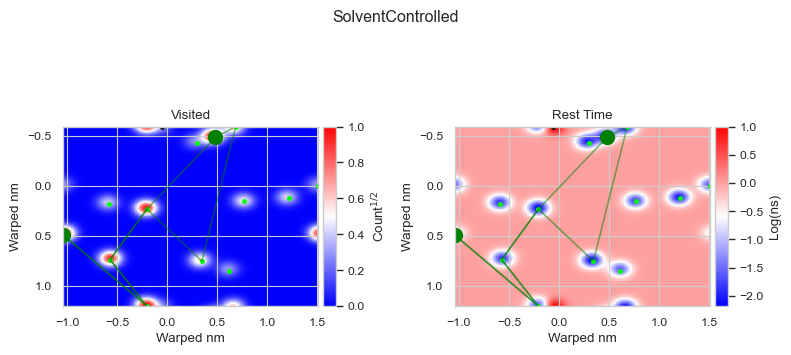

Smoothing Energy Map


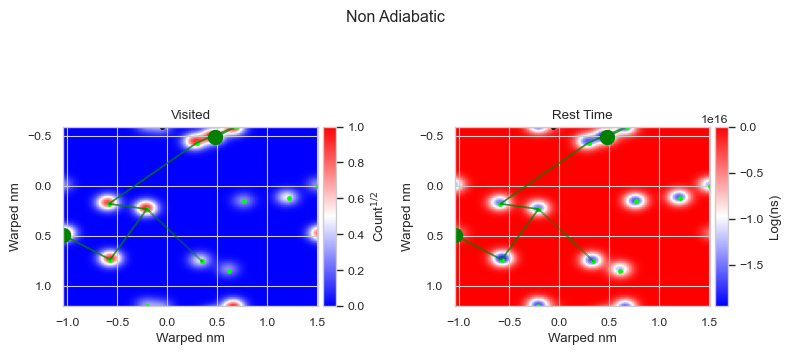

In [14]:



#add information about rates to the network to allow for rate calculations
for model in models:
    KMC_Protein. RateNetwork(model['Graph'])

for model in models:
    G=model['Graph']
    shortestPaths=[]
    
    startNodes = [] 
    endNodes = []                
    for node in G.nodes():
        if G.nodes[node]['label']=='startNode':
            startNodes.append(node)
        if G.nodes[node]['label']=='endNode':
            endNodes.append(node)
    
    for startNode in startNodes:
        for endNode in endNodes:
            shortestPaths .extend( KMC_Protein. CalculatePaths(G, startNode,endNode, weight='time'  ))
    
    shortestPaths =KMC_Protein.sortPaths(shortestPaths, 'time')
    uniquePaths = []
    lastPath =[]
    for path in shortestPaths:
        if len(path['path'])!=len(lastPath):
            uniquePaths.append(path)
            lastPath = path['path']
        elif np.sum(path['path'])!=np.sum(lastPath):
            uniquePaths.append(path)
            lastPath = path['path']
    shortestPaths=uniquePaths
    #compare the time of the first jump compared to the whole time to be occupancy
    for path in shortestPaths:
        injectTime = path['times'][0]
        pathTime = np.sum(path['times'][1:])
        occupancy = pathTime/(injectTime)
        if occupancy>2:
            occupancy=2
        path['occupancy']=occupancy
    
    model['ShortestPaths']=shortestPaths    
 

KMC_Plotting. PlotShortedPaths(models)

for model in models:
    KMC_Plotting.PlotPathMetrics(model['Graph'], model['ShortestPaths'], model['name'] )



TYR -> TYR   /A:36 /A:88
Published
Total paths tested:  43
The average tunnel distance is 0.49 nm
All paths must make at least one jump >= 0.78 nm jump


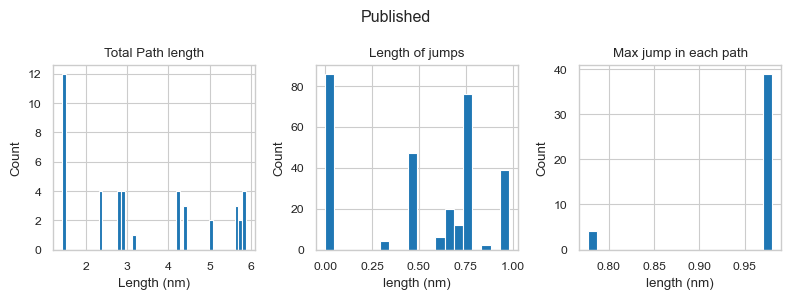

TYR -> TRP   /A:55 /A:69
SolventControlled
Total paths tested:  43
The average tunnel distance is 0.44 nm
All paths must make at least one jump >= 0.77 nm jump


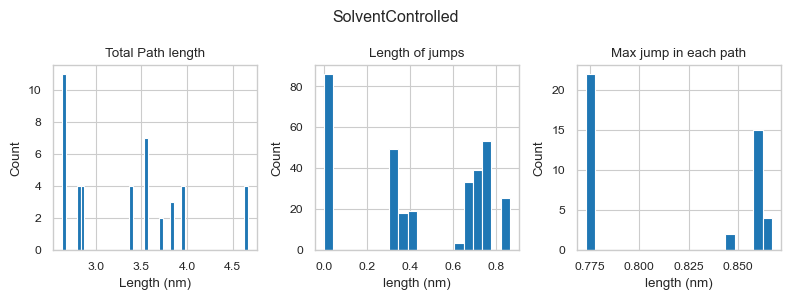

TYR -> TYR   /A:54 /A:55
Non Adiabatic
Total paths tested:  41
The average tunnel distance is 0.39 nm
All paths must make at least one jump >= 0.70 nm jump


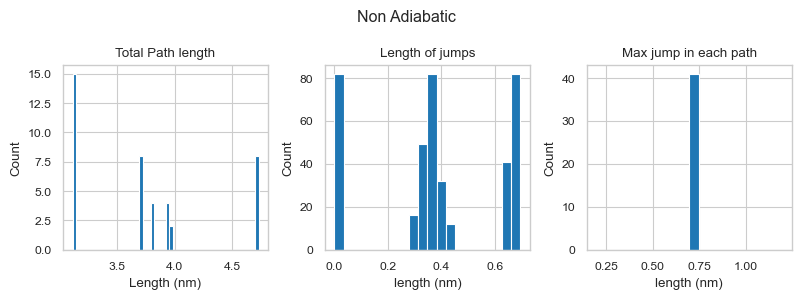

In [15]:
def PlotDistancePaths(G_connected, shortestPaths , graphName):
    #collect all the lengths and determine what the common longest jump is
    totalLength = []
    distances  = []
    minMaxDist = []
    
    maxPathStartIndex=0
    maxPathEndIndex=0
    for path in shortestPaths:   
        maxDist = 0
        
        dists = [] 
        for i in range(len( path['path'])-1):
            dist = G_connected[path['path'][i]][path['path'][i+1]]["minDist"]  
            #print(dist,  G_connected[path['path'][i]][path['path'][i+1]])
            dists.append(dist)
            if dist > maxDist:
                maxDist = dist
                maxPathEndIndex = path['path'][i+1]
                maxPathStartIndex = path['path'][i]
                
        minMaxDist.append(maxDist)
        distances.extend(dists)
        totalLength.append(np.sum(dists))
            
    donor , acceptor = G_connected.nodes[maxPathStartIndex]['activeAmino'], G_connected.nodes[maxPathEndIndex]['activeAmino']            
    print(f"{ donor['amino'] } -> { acceptor['amino'] }   /{ donor['chain']}:{ donor['index']} /{ acceptor['chain']}:{ acceptor['index']}")
    _,ax = plt.subplots(1,3,figsize=(8,3))
            
    ax[0].hist(totalLength, bins=50)
    ax[0].set_title('Total Path length')
    ax[0].set_xlabel('Length (nm)')
    ax[0].set_ylabel('Count')


    ax[1].hist(distances, bins=20)
    ax[1].set_title('Length of jumps')
    ax[1].set_xlabel('length (nm)')
    ax[1].set_ylabel('Count')

    ax[2].hist(minMaxDist, bins=20)
    ax[2].set_title('Max jump in each path')
    ax[2].set_xlabel('length (nm)')
    ax[2].set_ylabel('Count')
    
    plt.suptitle(graphName)

    print(graphName)
    print('Total paths tested: ', len(shortestPaths))
    print(f'The average tunnel distance is { np.mean(distances):.2f} nm')
    print(f'All paths must make at least one jump >= { np.min(minMaxDist):.2f} nm jump')
    plt.tight_layout( h_pad=2)
    plt.show()
    
for model in models:
    PlotDistancePaths(model['Graph'],model['ShortestPaths'], model['name'] )    

## Rates Graphs

Once again the maniform transform is used to show the pathways through the system.  For the case of the rest time on the left, the tranfer rates inside the proteins show rapid exchange and diffusion within each protein, but very slow rates between the center.  The dots show the locations of each of the redox cofactors and the shade of green indicates that redox energy needed to oxidize that molecule.  Frequently, the path does jump through the harder to react Met residues, which may not be physical in an actual protein

The visited graph shows that some sites on the protein are virtually required for the graph to be able to reach the exit.  These sites are critical and are in the most mobile area of this construct, resulting in unstable transit times.

In [16]:

def MoveElectron(G_test, electronLocation):
    """Walk through the probabilities avaible at this node and select the node based on a random number
    The nodes have been arranged from most probably to least to allow a quick lookup

    Args:
        G_test (graph): graph that has the exit probabilities for each node available
        electronLocation ( int ): current node location of electron

    Returns:
        _type_: next node location,                time to move to next node
    """
    newLocation = -1
    rate = 0
    # get all the options for electron at this step
    rates = G_test.nodes[electronLocation]['rates']

    v = rng.random()
    for i in range(len(rates)):
        if v < rates[i]:
            newLocation = G_test.nodes[electronLocation]['targets'][i]
            jumptime = G_test.nodes[electronLocation]['times'][i]
            break

    if newLocation == -1:
        newLocation = G_test.nodes[electronLocation]['targets'][-1]

    totalRate = G_test.nodes[newLocation]['outrate']

    return newLocation, totalRate, jumptime


def KMC(G_test,   numberElectrons=5000, maxIterations=500000):
    """_summary_

    Args:
        G_test (_type_): _description_
        startElectronNode (_type_): _description_
        activeAminos (_type_): _description_
        endElectroneNode (_type_): _description_
        numberElectrons (int, optional): _description_. Defaults to 5000.
        maxIterations (int, optional): _description_. Defaults to 500000.

    Returns:
        _type_: _description_
    """
    startElectronNodes = []
    endElectroneNodes = []
    for node in G_test.nodes():
        if G_test.nodes[node]['label'] == 'startNode':
            startElectronNodes.append(node)
        if G_test.nodes[node]['label'] == 'endNode':
            endElectroneNodes.append(node)

    stats = {}
    for node in G_test.nodes():
        stats[node] = {'successDwellTimes': 0, 'dwellTime': 0, 'passes': 0}
        G_test.nodes[node]['dwellTime'] = 0

    electronTimes = np.zeros(numberElectrons, dtype=float)
    diffusions = []

    locations = np.zeros(maxIterations, dtype=int)
    distances = np.zeros(maxIterations, dtype=float)
    times = np.zeros(maxIterations, dtype=float)

    successCount = 0
    for attempt in range(numberElectrons):

        # choose a random start and end point
        electronLocation = startElectronNodes[rng.integers(
            0, len(startElectronNodes))]
        seeking = True
        cc = -1

        while seeking:
            cc += 1

            # look at the rates to get the next location
            newLocation, Q, jumptime = MoveElectron(G_test, electronLocation)

            # move the time forward based on the rates available
            timeStep = 1/Q*np.log(1/rng.random())

            # get the distance that will be jumped
            dx = G_test[electronLocation][newLocation]['minDist']
            # dx= np.linalg.norm( activeAminos[electronLocation]['centerOfMass']-activeAminos[newLocation]['centerOfMass'])

            # record the locations and rates
            locations[cc] = electronLocation
            distances[cc] = dx
            times[cc] = timeStep

            # mark the current location with how long the electron stays there
            stats[electronLocation]['dwellTime'] += timeStep
            # mark that the electron has passed through this location
            stats[electronLocation]['passes'] += 1

            # move the electron to the next location
            electronLocation = newLocation

            # if the electron has reached the injection node, record the dwell times
            if (cc >= maxIterations-1):
                seeking = False
                diffusions.append(np.mean((distances[:cc]**2)/(2*times[:cc])))
                cc = -1
            # check if we have found the endpoint
            elif electronLocation in endElectroneNodes:
                seeking = False

                # walk through all the locations and add the dwell times to the success stats
                for i in range(cc):
                    stats[locations[i]]['successDwellTimes'] += times[i]

                diffusions.append (
                    np.mean((distances[:cc]**2)/(2*times[:cc])))
                electronTimes[successCount] = (np.sum(times[:cc]))
                cc = -1
                successCount += 1

    return stats, electronTimes[:successCount], diffusions 


def PlotKMC( electronTimes, diffusions,title):
    _, ax = plt.subplots(1, 3, figsize =(9,3))
    bins = np.linspace(0, np.min([np.max(diffusions),100]) , 50)
    ax[0].hist(diffusions,bins=bins )
    ax[0].set_xlabel('Average Diffusion nm^2/ns')
    ax[0].set_ylabel('Count')
    ax[0].set_title('Diffusion Distribution')
    
    ax[1].hist(np.log10(electronTimes), bins=50)
    ax[1].set_xlabel('Transit Times log10(ns)')
    ax[1].set_ylabel('Count')
    ax[1].set_title('Transit Times')
    
    
    #ACS Omega paper page G  using this to give a rough estimate of the current
    currents_sum = np.log10(6.24e-18/(np.array(electronTimes)*1e-9)+1e-25)+9
    ax[2].hist(currents_sum, bins=50)
    ax[2].set_xlabel('Current log10(nA)')
    ax[2].set_ylabel('Count')
    ax[2].set_title('Single Electron Currents')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()     

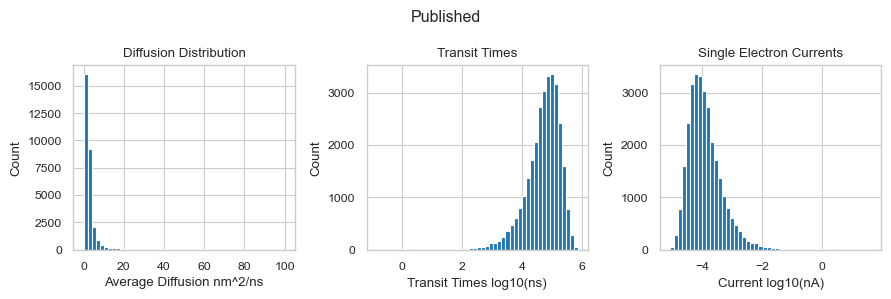

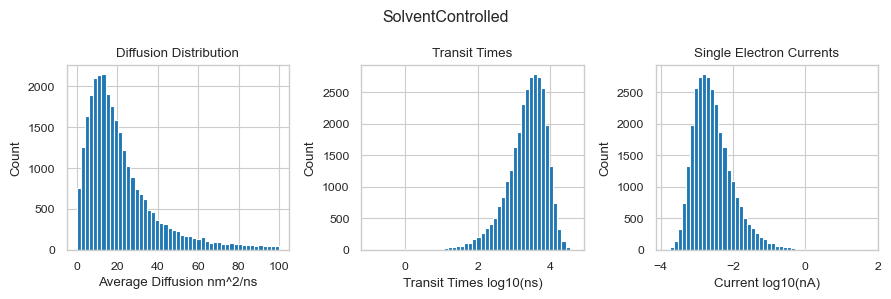

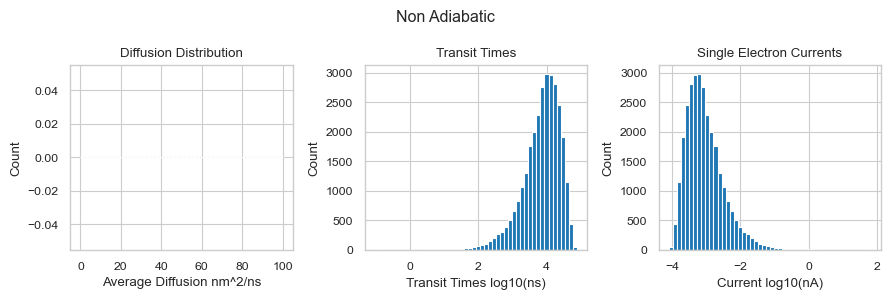

In [17]:
##################################################################################
#################      Kinetic Monti Carlo            ############################
##################################################################################

for model in models:
    stats, electronTimes, diffusions=KMC(model['Graph'],  numberElectrons=30000, maxIterations = 50000 ) 
    PlotKMC(  electronTimes, diffusions, model['name'] ) 
    



## Comparison with the published values

The overall rates compare favorable with those in the publication for this model (expected value of 20 nm^2/ns). We still get what would be very low currents from the model, especially when the resistance of the contacts is also added to this system.  A better model would allow multiple electrons to exist inside the molecule and estimate the injection rate with added electrons.

## 

Current for Published = 1.10e-01 nA


C:\Users\bashc\AppData\Local\Temp\ipykernel_29520\2881706816.py:131: RuntimeWarning: invalid value encountered in log10
  ax[1].hist(np.log10(electronTimes), bins=50)
C:\Users\bashc\AppData\Local\Temp\ipykernel_29520\2881706816.py:138: RuntimeWarning: invalid value encountered in log10
  currents_sum = np.log10(6.24e-18/(np.array(electronTimes)*1e-9)+1e-25)+9


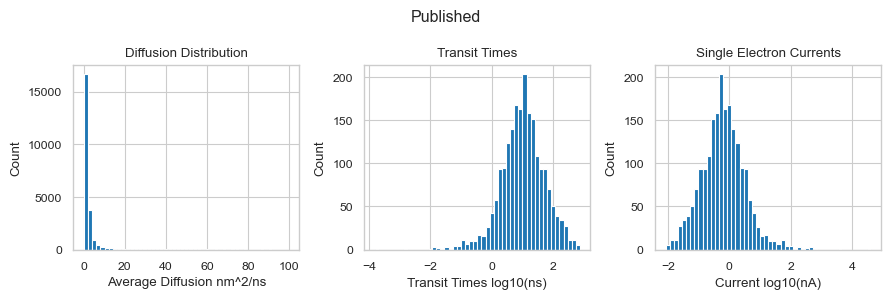

Current for SolventControlled = 2.38e-02 nA


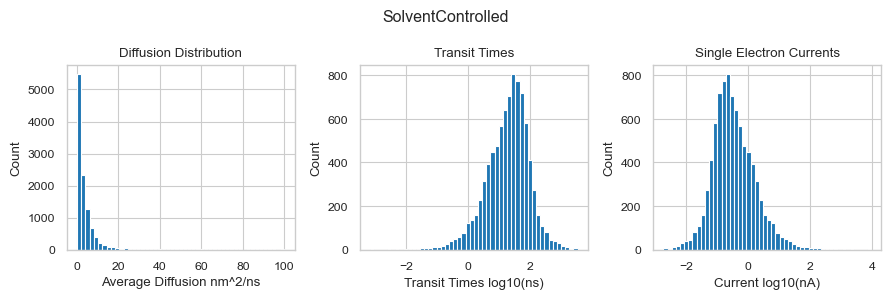

Current for Non Adiabatic = 1.22e-02 nA


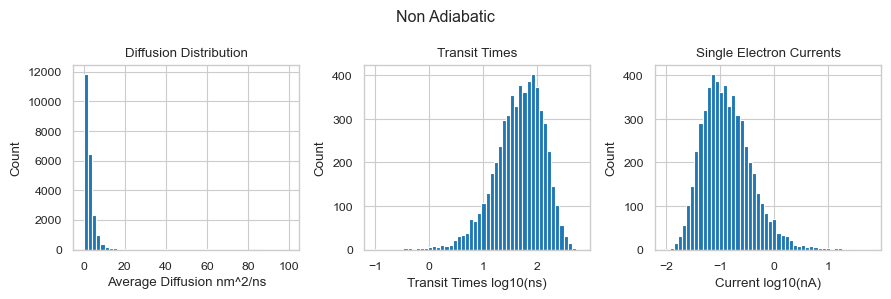

In [18]:

def nonInteractingMoveElectron(G_test, electronInfo):
    """Walk through the probabilities avaible at this node and select the node based on a random number
    The nodes have been arranged from most probably to least to allow a quick lookup

    Args:
        G_test (graph): graph that has the exit probabilities for each node available
        electronLocation ( int ): current node location of electron

    Returns:
        _type_: next node location,                time to move to next node
    """
    electronLocation=electronInfo['node']
    
    # get all the options for electron at this step
    rates = G_test.nodes[electronLocation]['rates']
    
    
    goodRates =[]
    for i in range(len(rates)):
        if G_test.nodes[G_test.nodes[electronLocation]['targets'][i]]['occupied'] == 0:
            goodRates.append(rates[i])
        else:
            goodRates.append(-1)
  
    totalRate = np.sum(goodRates)
    if totalRate==0:
        totalRate= G_test.nodes[electronLocation]['outrate']
        return electronLocation, totalRate, totalRate
    
    newLocation = -1
    v = rng.random()
    for i in range(len(rates)):
        if v < goodRates[i]:
            newLocation = G_test.nodes[electronLocation]['targets'][i]
            jumptime = G_test.nodes[electronLocation]['times'][i]
            break

    if newLocation==-1:
        totalRate= G_test.nodes[electronLocation]['outrate']
        return electronLocation, totalRate, totalRate

    return newLocation, totalRate, jumptime


def KMC_NonInteracting(G_test,   maxElectrons=5000, maxIterations=500000):
    """_summary_

    Args:
        G_test (_type_): _description_
        startElectronNode (_type_): _description_
        activeAminos (_type_): _description_
        endElectroneNode (_type_): _description_
        maxElectrons (int, optional): _description_. Defaults to 5000.
        maxIterations (int, optional): _description_. Defaults to 500000.

    Returns:
        _type_: _description_
    """
    
#G_test, numberElectrons, maxIterations=(G_pub,  30000,  50000)  
  
        
    startElectronNodes = []
    endElectroneNodes = []
    for node in G_test.nodes():
        if G_test.nodes[node]['label'] == 'startNode':
            startElectronNodes.append(node)
        if G_test.nodes[node]['label'] == 'endNode':
            endElectroneNodes.append(node)

    stats = {}
    for node in G_test.nodes():
        stats[node] = {'successDwellTimes': 0, 'dwellTime': 0, 'passes': 0}
        G_test.nodes[node]['dwellTime'] = 0
        G_test.nodes[node]['occupied'] = 0

    electronTimes = []
    diffusions   = []
    electronLocations = [] 
    currentTime =0
        
    cc=0
    numberElectrons=0
    while True:
        iNode = startElectronNodes[rng.integers(0, len(startElectronNodes))]
        if G_test.nodes[iNode]['occupied'] ==0:
            electronLocations.append ( { "node":iNode , "startTime":currentTime,'currentTime':currentTime, 'iterations':0, "diffSum":0,"diffCount":0})
            G_test.nodes[iNode]['occupied'] =1
            numberElectrons+=1
            
        electronLocations = sorted(electronLocations, key=lambda x: x['currentTime'])
        
        electronLocation = electronLocations[0]
        currentTime = electronLocation['currentTime']
        currentNode = electronLocation['node']
        # look at the rates to get the next location
        newLocation, Q, jumptime = nonInteractingMoveElectron(G_test, electronLocation)
        
        # move the time forward based on the rates available
        timeStep = 1/Q*np.log(1/rng.random())
        

        # mark the current location with how long the electron stays there
        stats[currentNode]['dwellTime'] += timeStep
        # mark that the electron has passed through this location
        stats[currentNode]['passes'] += 1

        G_test.nodes[currentNode]['occupied'] =0
        G_test.nodes[newLocation]['occupied'] =1
        # move the electron to the next location
        if newLocation != electronLocation['node']:
            dx = G_test[currentNode][newLocation]['minDist']
            electronLocation['diffSum'] += (dx)**2/(2*timeStep)
            electronLocation['diffCount'] += 1
            
        electronLocation ['node']= newLocation
        
        electronLocation ['currentTime'] += timeStep    
        electronLocation ['iterations'] += 1
        
        currentTime = electronLocation['currentTime']
        
        cc+=1
        # if the electron has reached the injection node, record the dwell times
        if (electronLocation ['iterations']  >= maxIterations-1):
            diffusions.append(electronLocation['diffSum']/electronLocation['diffCount'])
            #electronTimes.append( electronLocation['currentTime']-electronLocation['startTime'])
            G_test.nodes[electronLocation['node']]['occupied'] =0
            electronLocations.remove(electronLocation)
            iNode = startElectronNodes[rng.integers(0, len(startElectronNodes))]
        # check if we have found the endpoint
        elif newLocation in endElectroneNodes:
            # if len(electronTimes)%1000==0:
            #     print(len(electronTimes))
            # elif len(electronTimes)%10==0:
            #     print('.',end="")
            # walk through all the locations and add the dwell times to the success stats
            diffusions.append(electronLocation['diffSum']/electronLocation['diffCount'])
            electronTimes.append( electronLocation['currentTime']-electronLocation['startTime'])
            G_test.nodes[electronLocation['node']]['occupied'] =0
            electronLocations.remove(electronLocation)
            if len(electronTimes)>maxElectrons:
                return stats, electronTimes , diffusions,currentTime
        elif numberElectrons>maxElectrons:
            return stats, electronTimes , diffusions,currentTime
        
for model in models:        
    stats, electronTimes , diffusions ,currentTime= KMC_NonInteracting(model['Graph'],  30000,  50000)                
    print(f"Current for {model['name']} = { 1.602176634e-19* len(electronTimes)/(currentTime*1e-9)*1e9:.2e} nA")
    PlotKMC(  electronTimes, diffusions, model['name'] )                 
          